In [1]:
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as pyp

['.ipynb_checkpoints', 'closed_issue_comments.csv', 'closed_merged_prs.csv', 'data-vis-sample.ipynb', 'issue-comment-regression.png', 'issue-comments-pie.png', 'issue-comments.ipynb', 'issue-contrib.ipynb', 'issue_assignees.csv', 'issue_contrib.csv', 'open_closed_merged_prs.csv', 'positive_negative_pr_contributions.csv', 'repo_maintenance.csv', 'sentiment-analysis.ipynb', 'sentiment_analysis.csv', 'Untitled1.ipynb']


In [2]:
pd.set_option('max_columns', 50)
#Inline imaging
%matplotlib inline
df = pd.read_csv('issue_contrib.csv', delimiter='|')
#df.set_index('author', inplace=True)
df.head(1)



,filetype,sha,author
0,md,498d65611388d2881e6ae24f74bd68a832a24211,bhuga


In [8]:
nosha = df[['author', 'filetype']]

files = nosha.groupby('filetype')
bard = files.get_group('md')
bard.filetype.value_counts()
#Add sum of all md contributions to it's own column to build first subplot 
bard['total'] = bard.filetype.count()

author_contribs = bard.author.value_counts()

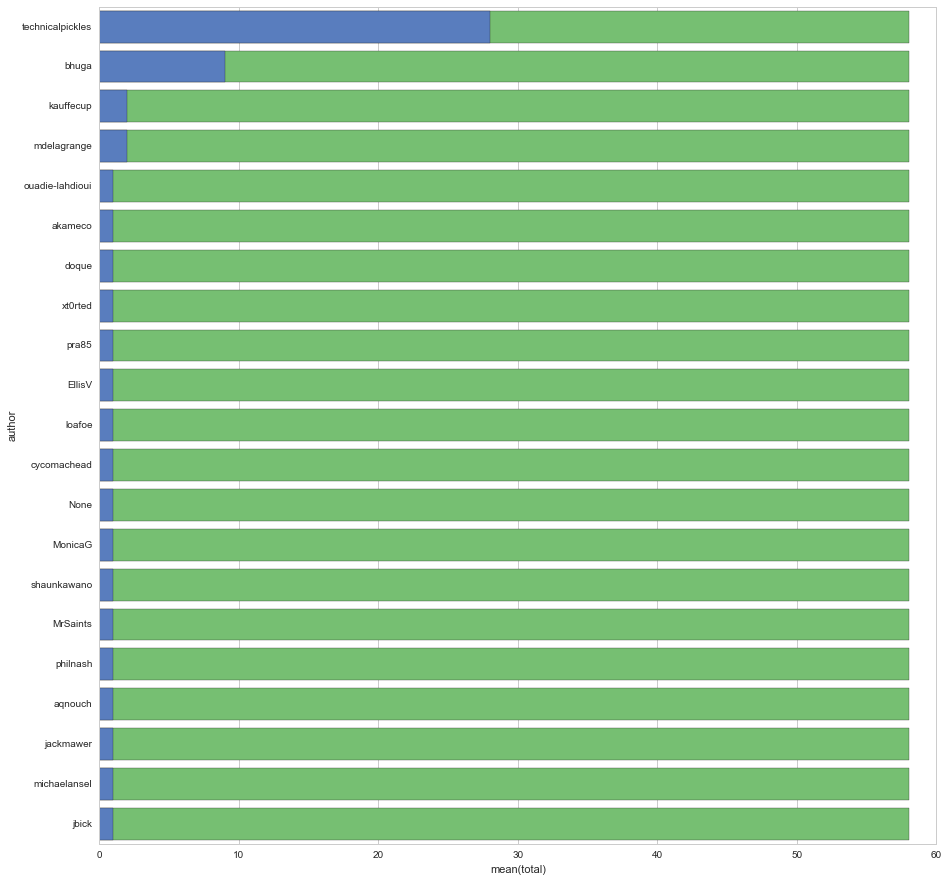

In [10]:
sns.set(style="whitegrid")
pyp.subplots(figsize=(15, 15))
bar1 = sns.barplot(x="total", y="author", data=bard, label="Total", color="g")
sns.set_color_codes("muted")
bar2 = sns.barplot(x=author_contribs.values, y=author_contribs.index, data=bard, label="By author", color="b")
pyp.savefig('horiz_barplot')